In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display as ICD
import seaborn as sns
import glob
import scipy
import os
pd.set_option('display.max_columns', 100)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
DATA_FOLDER = './avg_data/'
os.listdir(DATA_FOLDER)
all_anem=glob.glob(DATA_FOLDER + "anem*")
mast_anem=all_anem[:6]
top_anem=all_anem[6]
only_mag=True
h=np.arange(1.5,22,4)
df_list=[]
for idx,i in enumerate(mast_anem):
    df_temp=pd.read_csv(i, sep=" ", header=None, index_col=0, names=['u','direction'])
    df_temp['h']=h[idx]
    df_list.append(df_temp)
mast_anem_df = pd.concat(df_list)
rad_df = pd.read_csv(DATA_FOLDER+'radiometer.csv', sep=" ",index_col=0)
temp_df = pd.read_csv(DATA_FOLDER+'surf_temp.txt', sep=" ",index_col=0)
top_anem_df = pd.read_csv(top_anem, sep=" ",index_col=0,names=['u_top','direction_top'])
time_var_df = top_anem_df.merge(rad_df,how='left', left_index=True,right_index=True)
time_var_df = time_var_df.merge(temp_df,how='left', left_index=True,right_index=True)
tot_df=mast_anem_df.merge(time_var_df,how='left', left_index=True,right_index=True)
tot_df = tot_df.dropna(axis=0, how='any')
tot_df = tot_df.drop(columns=['Albedo [-]'])
tot_df

,u,direction,h,u_top,direction_top,Pyranometer Upper Irradiance [W/m$^2$],Pyranometer Lower Irradiance [W/m$^2$],Pyrgeometer Upper Irradiance [W/m$^2$],Pyrgeometer Lower Irradiance [W/m$^2$],Net Solar radiation [W/m$^2$],Net (total) radiation [W/m$^2$],Net Far Infrared radiation [W/m$^2$],Sky temperature [°C],Radiometer Ground temperature [°C],Sensor Ground temperature [°C],North temperature [°C],East temperature [°C],South temperature [°C],West temperature [°C]
2018-11-14 00:00:00,0.66,160.0,1.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.91,225.0,5.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,0.57,185.0,9.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.64,284.0,13.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.98,313.0,17.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:00:00,2.71,328.0,21.5,2.76,298.0,1.8,-2.9,369.0,364.7,4.7,9.0,4.3,10.9,10.0,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.69,187.0,1.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.99,272.0,5.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,0.61,248.0,9.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5
2018-11-14 00:01:00,2.25,281.0,13.5,2.61,316.0,2.2,-0.0,371.7,365.8,2.2,8.1,5.9,11.4,10.3,10.5,13.1,11.8,11.6,10.5


In [3]:
def categorization(feature, bin_):
    feature = np.array(feature)
    bin_ = np.array(bin_)
    feature_cat = np.copy(feature)
    for i in range(0,feature.shape[1]):
        cut = pd.cut(feature[:,i],bin_[i])
        index = cut.codes
        categories = cut.categories.values
        median = []
        for j in range(0,categories.shape[0]):
            add = 0.5*(categories[j].left + categories[j].right)
            median.append(add)                           
        median = np.array(median)
        element = median[index]
        feature_cat[:,i] = element
    return feature_cat

def categorization_index(feature, bin_):
    feature = np.array(feature)
    bin_ = np.array(bin_)
    feature_cat = np.copy(feature)
    for i in range(0,feature.shape[1]):
        cut = pd.cut(feature[:,i],bin_[i])
        index = cut.codes
        feature_cat[:,i] = index
    return feature_cat

[[ 2  8  0 ...  0  0  1]
 [ 3 12  3 ...  0  0  1]
 [ 2 10  7 ...  0  0  1]
 ...
 [ 8  9 11 ...  1  3  2]
 [ 9 12 15 ...  1  3  2]
 [ 9 14 19 ...  1  3  2]]


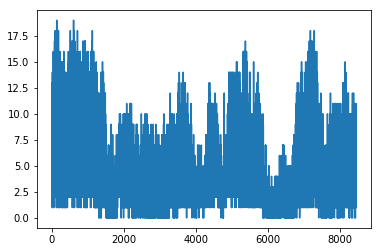

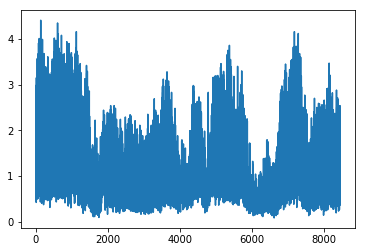

In [4]:
bin_ = 20*np.ones(19)
data = tot_df.iloc[:,0:-1]
cat = categorization_index(data, bin_)
plt.figure()
plt.plot(cat[:,0])
plt.figure()
plt.plot(np.array(data)[:,0])
cat = cat.astype(int)
print cat

In [5]:
## random forest
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
#x, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
x = cat[:,2:-1]
y = cat[:,1:2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
feat_labels = tot_df.columns[2:]

In [7]:
## output of the random forest
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) h                              0.292449
 2) u_top                          0.149989
 3) direction_top                  0.131971
 4) Radiometer Ground temperature [°C] 0.048763
 5) Pyrgeometer Upper Irradiance [W/m$^2$] 0.047744
 6) Pyrgeometer Lower Irradiance [W/m$^2$] 0.046634
 7) Sky temperature [°C]          0.046507
 8) East temperature [°C]         0.044766
 9) Pyranometer Lower Irradiance [W/m$^2$] 0.044562
10) Net Far Infrared radiation [W/m$^2$] 0.043600
11) Sensor Ground temperature [°C] 0.032507
12) Net (total) radiation [W/m$^2$] 0.023010
13) North temperature [°C]        0.021094
14) Net Solar radiation [W/m$^2$]  0.014355
15) Pyranometer Upper Irradiance [W/m$^2$] 0.012049
